# Ejercicio 5

Realizo la extracción de términos del documento, el cual se encuentra en la carpeta "cervantes" ubicada en el mismo directorio que este archivo.

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from tokenizador_ej5 import Tokenizador
tokenizador = Tokenizador("cervantes", None, False, None, 3, 15)
tokenizador.analizar_directorio()

ANÁLISIS DE DOCUMENTOS EN PROGRESO
ANÁLISIS DE DOCUMENTOS FINALIZADO


True

Ordeno los términos por su frecuencia para obtener el ranking y grafico la distribución correspondiente.

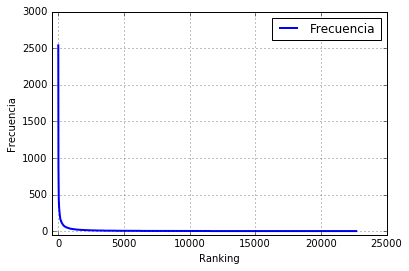

In [56]:
terminos_rankeados = sorted(tokenizador.terminos.keys(), key=lambda x: (tokenizador.terminos[x]["CF"]), reverse=True)
frecuencias = []
for termino in terminos_rankeados:
    frecuencias.append(tokenizador.terminos[termino]["CF"])
ranking = xrange(1, len(frecuencias) + 1)
figura, grafico = plt.subplots()
grafico.plot(ranking, frecuencias, color="b", linewidth=2, label="Frecuencia")
grafico.legend(loc="upper right")
grafico.grid(True)
grafico.set_xlabel("Ranking")
grafico.set_ylabel("Frecuencia")
grafico.set_xlim(left=-500)
grafico.set_ylim(bottom=-50)
figura.show()

Como se puede ver en el gráfico, hay una pequeña cantidad de términos con muy alta frecuencia de aparición y una gran cantidad que aparece una sola vez en el corpus.

Luego establezco una función para graficar la distribución y la recta de ajuste en escala logarítmica.

In [57]:
def graficar_frecuencias_log(ranking, frecuencias):
    x_log = np.log10(ranking)
    y_log = np.log10(frecuencias)

    recta_ajuste = np.polyfit(x_log, y_log, 1)
    r_cuadrado = pow(np.corrcoef(x_log, y_log)[0, 1], 2)

    recta_ecuacion = np.poly1d(recta_ajuste)
    recta_evaluada = recta_ecuacion(x_log)

    figura, grafico = plt.subplots()
    grafico.plot(x_log, y_log, color="b", linewidth=2, label="Frecuencia")
    grafico.plot(x_log, recta_evaluada, color="r", linewidth=2, label="Recta Ajuste")
    grafico.legend(loc="upper right")
    grafico.grid(True)
    grafico.set_xlabel("Log(Ranking)")
    grafico.set_ylabel("Log(Frecuencia)")
    grafico.set_xlim(left=0)
    grafico.set_ylim(bottom=0)
    grafico.text(0.1, 0.2, "R CUADRADO: " + str(r_cuadrado), horizontalalignment='left', verticalalignment='center')
    figura.show()

Gráfico de la distribución de las frecuencias y la recta de ajuste en escala logarítmica.

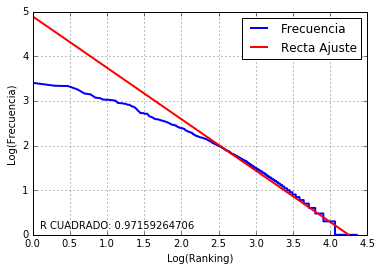

In [58]:
graficar_frecuencias_log(ranking, frecuencias)

La recta ajusta de manera bastante precisa en los valores intermedios, pero no predice tan bien los valores extremos, por lo tanto, se realiza la misma prueba podando distintos porcentajes de los términos más y menos frecuentes. Para poder realizar la poda calculo las frecuencias acumuladas.

In [59]:
frecuencia_total = sum(frecuencias)
frecuencias_acumuladas = [frecuencias[0]]
for i in xrange(1, len(frecuencias)):
    frecuencias_acumuladas.append(frecuencias[i] + frecuencias_acumuladas[i-1])

Defino una función que realice la poda de la lista de frecuencias.

In [60]:
def podar_ranking(frecuencias_absolutas, frecuencias_acumuladas, porcentaje_poda):
    frecuencia_total = sum(frecuencias_absolutas)
    frecuencias_absolutas_podadas = list(frecuencias_absolutas)
    ranking_podado = range(1, len(frecuencias_absolutas_podadas) + 1)
    corte_inferior = porcentaje_poda / float(100)
    corte_superior = 1 - corte_inferior
    for frecuencia_acumulada in frecuencias_acumuladas:
        frecuencias_absolutas_podadas.pop(0)
        ranking_podado.pop(0)
        if frecuencia_acumulada / float(frecuencia_total) >= corte_inferior:
            break
    for frecuencia_acumulada in reversed(frecuencias_acumuladas):
        frecuencias_absolutas_podadas.pop()
        ranking_podado.pop()
        if frecuencia_acumulada / float(frecuencia_total) <= corte_superior:
            break
    return (ranking_podado, frecuencias_absolutas_podadas)

Gráfico de frecuencias y de la recta de ajuste con una poda del 5%

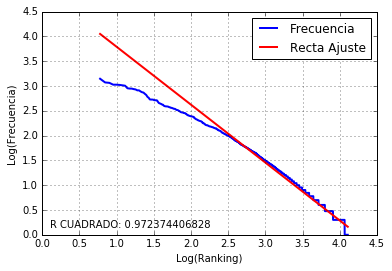

In [61]:
ranking_poda_5, frecuencia_poda_5 = podar_ranking(frecuencias, frecuencias_acumuladas, 5)
graficar_frecuencias_log(ranking_poda_5, frecuencia_poda_5)

Gráfico de frecuencias y de la recta de ajuste con una poda del 10%

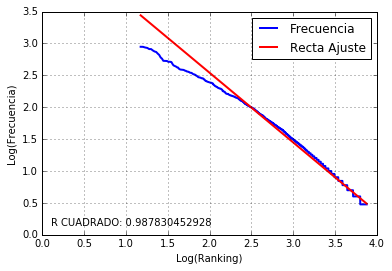

In [62]:
ranking_poda_10, frecuencia_poda_10 = podar_ranking(frecuencias, frecuencias_acumuladas, 10)
graficar_frecuencias_log(ranking_poda_10, frecuencia_poda_10)

Gráfico de frecuencias y de la recta de ajuste con una poda del 15%

In [1]:
ranking_poda_15, frecuencia_poda_15 = podar_ranking(frecuencias, frecuencias_acumuladas, 15)
graficar_frecuencias_log(ranking_poda_15, frecuencia_poda_15)

NameError: name 'podar_ranking' is not defined

A simple vista se observa que el mejor porcentaje de poda es 15% y que con este número se logra que la recta de ajuste tenga una coincidencia mayor con nuestra función. Para afirmar esto observamos que el R CUADRADO es de 0.989